In [1]:
import os,sys
import glob 
import pandas
from osgeo import gdal
from dateutil import parser
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  widget

In [2]:
workdir = '/data/ocp4/LagunaSalada/'

#cropdir='cropped_9000_20_10000_1780/'
cropdir='cropped_9000_1800_18000_3600/'

In [3]:
# display all the SLC dates to choose from
os.chdir(workdir+"/"+cropdir+"SLC_vv")
%ls
# why are these green? 

# still missing data between 20180222 and 20180914 for larger region 

20170510/  20190406/  20200218/  20201027/  20210706/
20170522/  20190430/  20200224/  20201102/  20210712/
20170603/  20190512/  20200301/  20201108/  20210718/
20170615/  20190524/  20200307/  20201114/  20210724/
20170627/  20190605/  20200313/  20201120/  20210730/
20170709/  20190617/  20200319/  20201126/  20210805/
20170721/  20190629/  20200325/  20201202/  20210811/
20170802/  20190711/  20200331/  20201208/  20210817/
20170814/  20190723/  20200406/  20201214/  20210823/
20170826/  20190804/  20200412/  20201220/  20210829/
20170907/  20190816/  20200418/  20201226/  20210904/
20170919/  20190822/  20200430/  20210101/  20210910/
20171013/  20190828/  20200506/  20210107/  20210916/
20171025/  20190903/  20200512/  20210113/  20210922/
20171106/  20190909/  20200518/  20210119/  20210928/
20171118/  20190915/  20200524/  20210125/  20211004/
20171130/  20190921/  20200530/  20210131/  20211010/
20171212/  20190927/  20200605/  20210206/  20211016/
20171224/  20191003/  202006

In [4]:
# choose dates of igram
date1='20211227'
date2='20220108'

In [5]:
# produce the interferogram 
x1=0
dx=18000
y1=0
dy=3600

ds = gdal.Open(workdir+"/"+cropdir+"/SLC_vv/"+date1+"/"+date1+".slc.full", \
               gdal.GA_ReadOnly)
slc1 = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)
ds = gdal.Open(workdir+"/"+cropdir+"/SLC_vv/"+date2+"/"+date2+".slc.full", \
               gdal.GA_ReadOnly)
slc2 = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)

int12 = slc1 * np.conj(slc2)

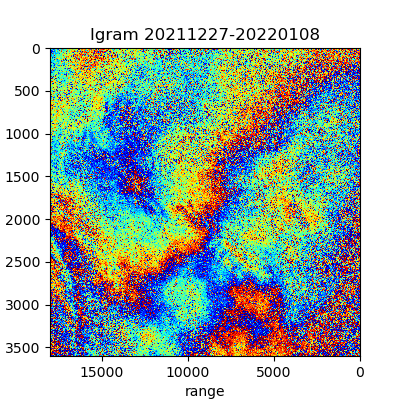

In [6]:
# plot the igram (full res)
plt.figure(figsize=(4, 4))
plt.imshow(np.angle(int12),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto', \
           interpolation='nearest')
plt.ylabel('azimuth'); plt.xlabel('range')
plt.title("Igram "+str(date1)+"-"+str(date2))
plt.xlim(np.shape(int12)[1], 0)
plt.show()

In [7]:
# choose the row I want to extract/condense around 
azrow = 1800
# how many rows off of this transect I want to average
distoffrow = 15
rangemin = 10000
rangemax = 16000

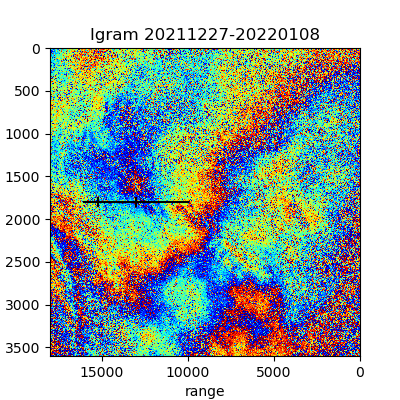

In [8]:
# plot the transect location on the igram
transectx = [rangemin,rangemax]; transecty = [azrow, azrow]
crossx = [13030, 13030]; crossx2 = [15200, 15200]; crossy = [1750, 1850]

# plot the igram with transect shown
plt.figure(figsize=(4, 4))
plt.imshow(np.angle(int12),vmin=-np.pi, vmax=np.pi, cmap='jet', \
           aspect='auto', interpolation='nearest')
plt.ylabel('azimuth'); plt.xlabel('range'); plt.title("Igram "+str(date1)+"-"+str(date2))
plt.plot(transectx, transecty,'k'); plt.plot(crossx, crossy, 'k')
plt.plot(crossx2, crossy, 'k')
plt.xlim(np.shape(int12)[1], 0)
plt.show()

In [9]:
# now extract the data subset I want
extract = int12[azrow-distoffrow:azrow+distoffrow, rangemin:rangemax]

# make sure this is the right size array 
print("size of extract: "+str(np.shape(extract))+"\
      rangemax-rangemin: "+str(rangemax-rangemin))

# average over the columns of the data array 
# axis=0 makes sure it does mean over the columns 
condensed = np.nanmean(extract,axis=0)
print("size of condensed: "+str(np.shape(condensed))) # (6000,) means it is vectors

size of extract: (30, 6000)      rangemax-rangemin: 6000
size of condensed: (6000,)


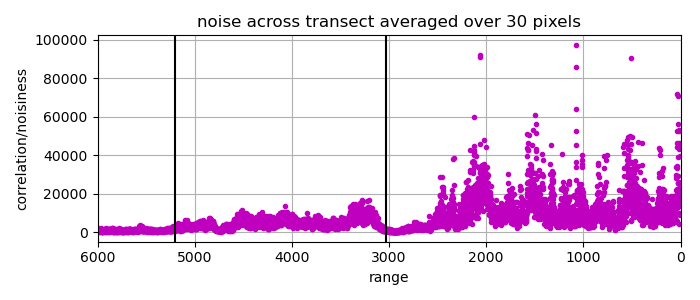

In [10]:
# plot the correlation of the transect
fig=plt.figure(figsize=(7, 3), tight_layout=True)
plt.plot(np.abs(condensed),'m.') 
plt.xlabel('range')
plt.ylabel('correlation/noisiness')
plt.xlim([rangemax-rangemin, 0])
#plt.ylim([-np.pi,np.pi])
# this is where Laguna shoreline begins
plt.axvline(x = 13030-rangemin, color='k')
plt.axvline(x = 15200-rangemin, color='k')
plt.title("noise across transect averaged over "+str(2*distoffrow)+" pixels")
plt.grid(); plt.show()